## DATA PREPARATION

In [15]:
#importing data manipulation libraries

import pandas as pd
import numpy as np


In [16]:
#importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
!pip install spacy

In [18]:
#importing nlp libraries
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [19]:
#loading the dataset into a pandas dataframe
data = pd.read_csv('Amazon Product Review.txt')

In [20]:
#displaying afew rows
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


The data has 16 columns.

In [21]:
# Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

The data has 30846 rows with 0 missing values for all the 16 columns.The columns are a mixture of integers and object data types.

In [22]:
# Display summary statistics for numerical columns
data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,3.084600e+04,30846.0,30846.000000,30846.00000,30846.000000,30846.000000
mean,2.471002e+07,2693241.0,4.336154,0.68641,0.895027,0.835343
std,1.611172e+07,0.0,1.120716,30.74337,32.356354,0.370876
min,1.134600e+04,2693241.0,1.000000,0.00000,0.000000,0.000000
25%,1.150637e+07,2693241.0,4.000000,0.00000,0.000000,1.000000
50%,2.294025e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
75%,4.008874e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.00000,3875.000000,1.000000


In [23]:
# Display unique values in each column
for column in data.columns:
    print(f"Unique values in {column}: {data[column].nunique()}")

Unique values in marketplace: 1
Unique values in customer_id: 30845
Unique values in review_id: 30846
Unique values in product_id: 21
Unique values in product_parent: 1
Unique values in product_title: 1
Unique values in product_category: 1
Unique values in star_rating: 5
Unique values in helpful_votes: 71
Unique values in total_votes: 80
Unique values in vine: 1
Unique values in verified_purchase: 2
Unique values in review_headline: 15715
Unique values in review_body: 27761
Unique values in review_date: 333
Unique values in sentiment: 2


## EXPLORATORY DATA ANALYSIS

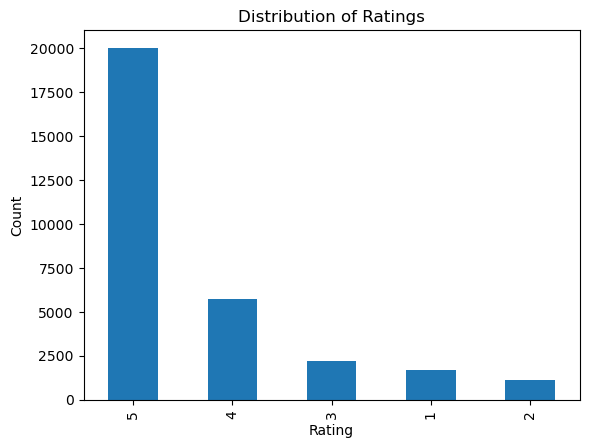

In [24]:
import matplotlib.pyplot as plt
# Explore the distribution of ratings
rating_counts = data['star_rating'].value_counts()
rating_counts.plot(kind='bar', title='Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


The star rating of 5 has the highest distribution.

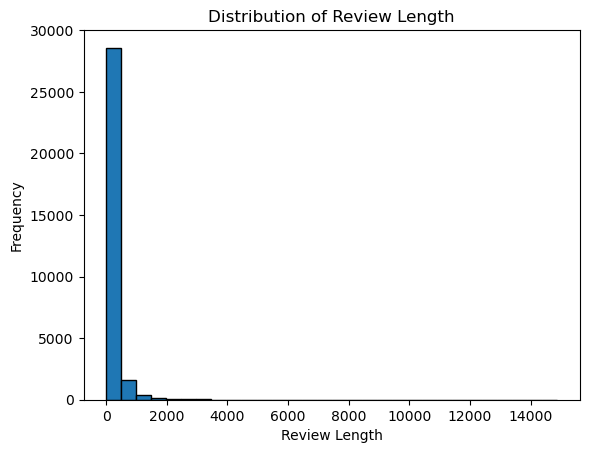

In [45]:
data['review_body'] = data['review_body'].astype(str)


# Analyze the length of reviews
data['review_length'] = data['review_body'].apply(len)
plt.hist(data['review_length'], bins=30, edgecolor='k')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


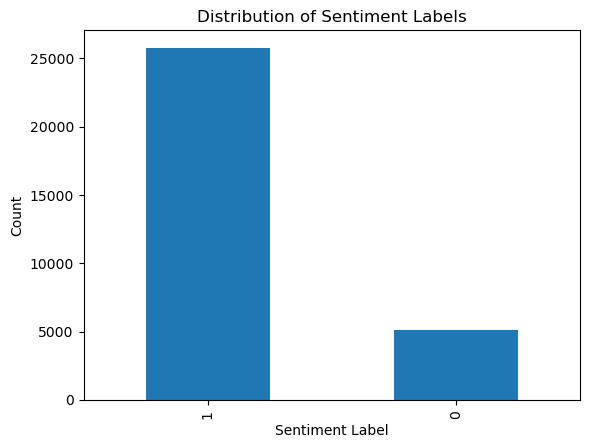

In [27]:
# Visualize the distribution of sentiment labels
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


In [28]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - --

In [29]:
# Use system default sans-serif font
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

In [30]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set a specific default font family (e.g., 'serif', 'sans-serif', or 'monospace')
default_font = fm.FontProperties(family='serif')

# Print the default TrueType font filename
print("Default TrueType font filename:", default_font.get_file())

# Print the default TrueType font name
print("Default TrueType font name:", default_font.get_name())


Default TrueType font filename: None
Default TrueType font name: DejaVu Serif


In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Get the default TrueType font
default_font = fm.FontProperties(family='')

# Print the default TrueType font filename
print("Default TrueType font filename:", default_font.get_file())

# Print the default TrueType font name
print("Default TrueType font name:", default_font.get_name())


findfont: Font family [''] not found. Falling back to DejaVu Sans.


Default TrueType font filename: None
Default TrueType font name: DejaVu Sans


In [32]:
!pip install --upgrade pip 

!pip install --upgrade Pillow

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/15/aa/3f4c7bcee2057a76562a5b33ecbd199be08cdb4443a02e26bd2c3cf6fc39/pip-23.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 653.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.1 MB 980.4 kB/s eta 0:00:03
   -- ------------------------------------- 0.2/2.1 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.1 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.1 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.1 MB 692.4 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/2.1 MB 724.0 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/2.1 MB 724.0 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.1 

ERROR: To modify pip, please run the following command:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/b1/38/31def4109acd4db10672df6f806b175c0d21458f845ddc0890e43238ba7c/Pillow-10.1.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 1.4 MB/s eta 0:00:02
    --------------------------------------- 0.0/2.6 MB 495.5 kB/s eta 0:00:06
   - -------------------------------------- 0.1/2.6 MB 751.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.6 MB 751.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.6 MB 655.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.6 MB 573.4 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/2.6 MB 655.9 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.6 MB 626.9 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/2.6 MB 630.2 kB/s eta 0:00:04
   ---- ----------------

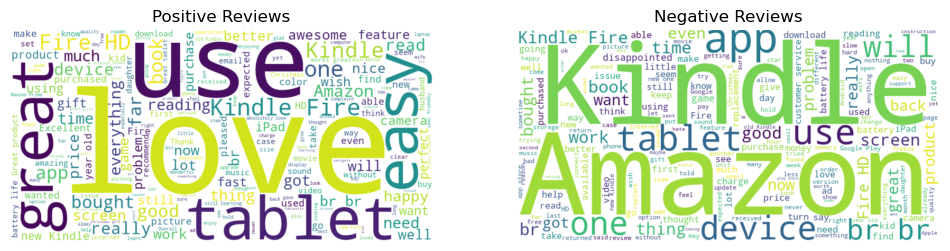

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = r'C:\Users\ERICA COMPUTER HUB\FLIT-Data-Science-Projects-1-15\Sentiment-Analysis-For-Product-Reviews\UchronyScLight-d929X.ttf'


# Separate positive and negative reviews
positive_reviews = data[data['sentiment'] == 1]['review_body']
negative_reviews = data[data['sentiment'] == 0]['review_body']

# Word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))

# Word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds for positive and negative reviews
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()


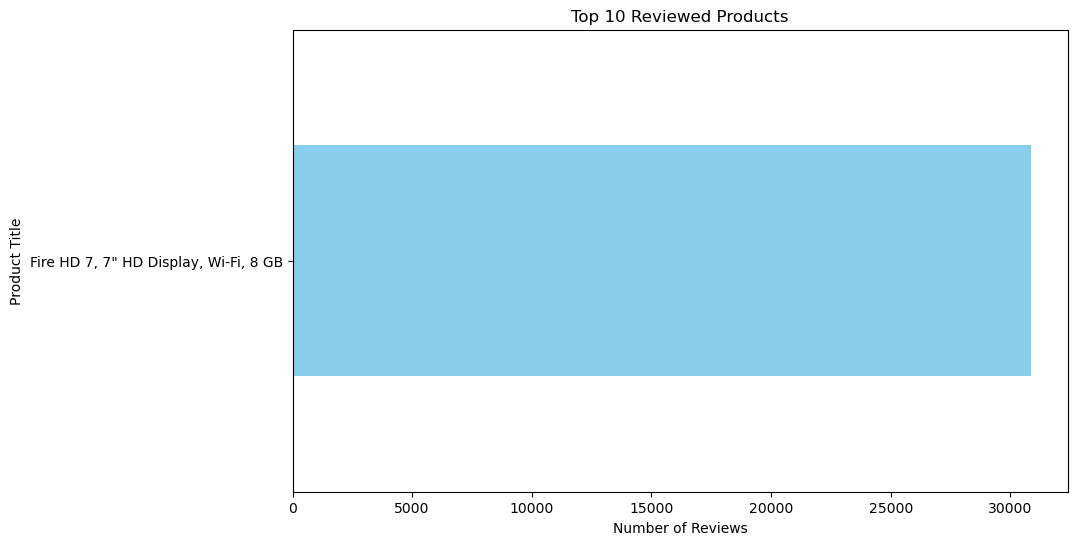

In [35]:
#Reviewd products analysis
product_counts = data['product_title'].value_counts()
plt.figure(figsize=(10, 6))
product_counts.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Title')
plt.show()


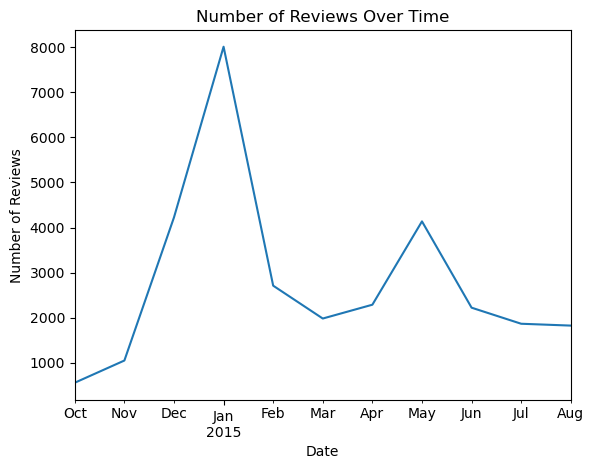

In [36]:
#Time based analysis
data['review_date'] = pd.to_datetime(data['review_date'])
data.set_index('review_date', inplace=True)
data.resample('M').size().plot(legend=False)
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


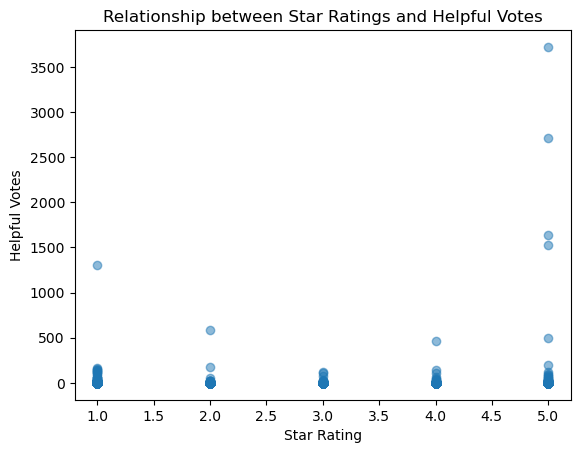

In [37]:
#helpfulness of reviews in star rating
plt.scatter(data['star_rating'], data['helpful_votes'], alpha=0.5)
plt.title('Relationship between Star Ratings and Helpful Votes')
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')
plt.show()


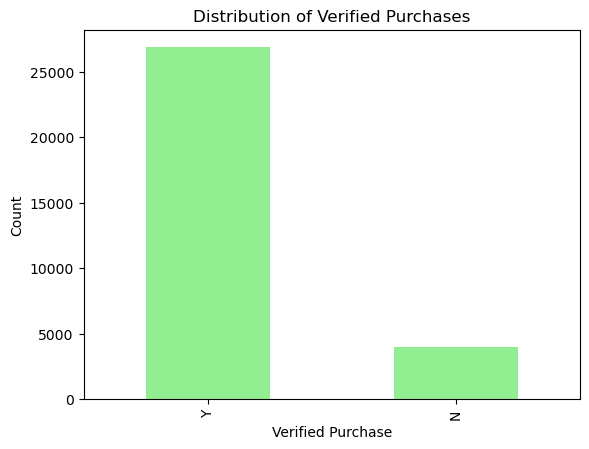

In [38]:
#Verified purchase analysis
verified_counts = data['verified_purchase'].value_counts()
verified_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.show()


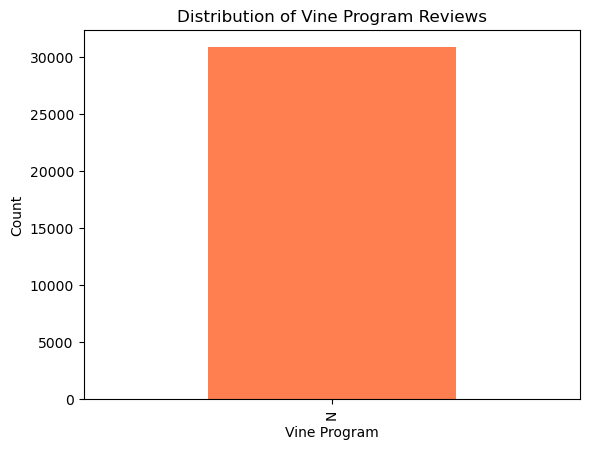

In [39]:
vine_counts = data['vine'].value_counts()
vine_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Vine Program Reviews')
plt.xlabel('Vine Program')
plt.ylabel('Count')
plt.show()


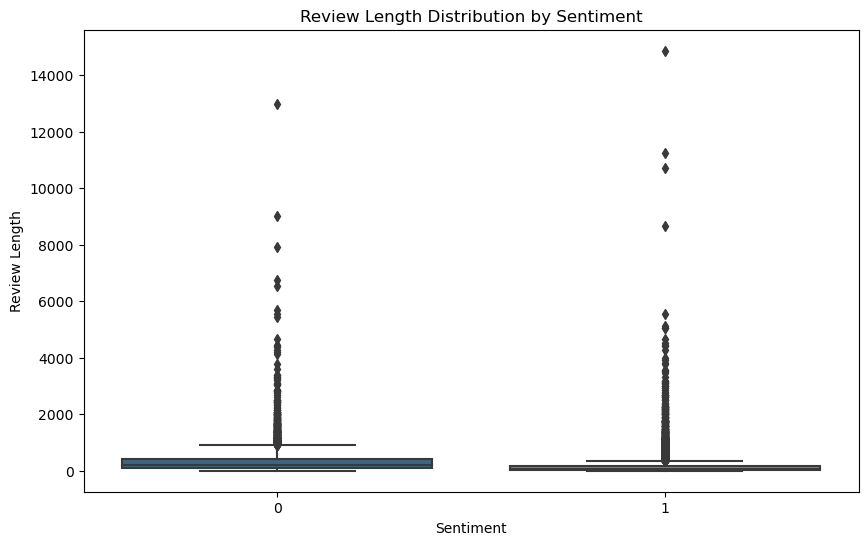

In [47]:
import seaborn as sns
#Review length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=data, palette='viridis')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


## DATA PREPROCESSING

In [41]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop rows with missing values (if necessary)
data.dropna(subset=['review_body'], inplace=True)


Missing Values:
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
sentiment            0
dtype: int64


In [42]:
#cleaning and preprocessing text data ie review_body column
import re

# Define a function for text cleaning and preprocessing
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the cleaning function to the 'review_body' column
data['cleaned_text'] = data['review_body'].apply(clean_text)


In [43]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 46.8 k

In [48]:
#Tokenizing and lematizing using spacy

# Load Spacy model
nlp = spacy.load('en_core_web_sm')

# Define a function for tokenization and lemmatization
def tokenize_and_lemmatize(text):
    tokens = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in tokens if not token.is_stop]
    return lemmatized_tokens

# Apply the tokenization and lemmatization function to the 'cleaned_text' column
data['tokenized_lemmatized'] = data['cleaned_text'].apply(tokenize_and_lemmatize)


A new column tokenized_lemmatized is defined

In [49]:
#Rule based approach
# function to map ratings to sentiment labels
def map_ratings_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the mapping function to the 'star_rating' column
data['sentiment_label'] = data['star_rating'].apply(map_ratings_to_sentiment)


New column for sentiment labels is defined.It is based on the ratings with a rating of >4 being psotive,3 being neutral and less than that negative.

In [50]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 145.2 kB/s eta 0:00:05
     - ----------------------------------- 30.7/636.8 kB 145.2 kB/s eta 0:00:05
     - ----------------------------------- 30.7/636.8 kB 145.2 kB/s eta 0:00:05
     ---- -------------------------------- 71.7/636.8 kB 218.6 kB/s eta 0:00:03
     ---- -------------------------------- 71.7/636.8 kB 218.6 kB/s eta 0:00:03
     ----- ------------------------------- 92.2/636.8 kB 218.5 kB/s eta 0:00:03
     ----- ------------------------------- 92.2/636.8 kB 218.5 kB/s eta 0:00:03
     ------ ----------------------------- 112.6/636.8 kB 204.8 kB/s eta 0:00:03
     ------ ----------------------------- 122.9/636.8 kB 212.1 kB

In [51]:
#pretrained sentiment analysis
from textblob import TextBlob

# Define a function to get sentiment labels using TextBlob
def get_sentiment_label(text):
    analysis = TextBlob(text)
    # TextBlob returns a polarity score (-1 to 1)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the sentiment analysis function to the 'cleaned_text' column
data['predicted_sentiment'] = data['cleaned_text'].apply(get_sentiment_label)


The sentiment lable is determined by the polarity score returned by textblob.

In [52]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Rule-Based Approach
rule_based_predictions = data['star_rating'].apply(map_ratings_to_sentiment)

# Pre-trained Sentiment Analysis Model (TextBlob)
textblob_predictions = data['cleaned_text'].apply(get_sentiment_label)

# Evaluate the performance
rule_based_accuracy = accuracy_score(data['sentiment_label'], rule_based_predictions)
textblob_accuracy = accuracy_score(data['sentiment_label'], textblob_predictions)

rule_based_classification_report = classification_report(data['sentiment_label'], rule_based_predictions)
textblob_classification_report = classification_report(data['sentiment_label'], textblob_predictions)

# Confusion Matrix for Rule-Based Approach
conf_matrix_rule_based = confusion_matrix(data['sentiment_label'], rule_based_predictions)

# Confusion Matrix for Pre-trained Sentiment Analysis Model
conf_matrix_textblob = confusion_matrix(data['sentiment_label'], textblob_predictions)

# Display the results
print("Rule-Based Approach:")
print(f"Accuracy: {rule_based_accuracy}")
print("Classification Report:\n", rule_based_classification_report)
print("Confusion Matrix:\n", conf_matrix_rule_based)

print("\nPre-trained Sentiment Analysis Model (TextBlob):")
print(f"Accuracy: {textblob_accuracy}")
print("Classification Report:\n", textblob_classification_report)
print("Confusion Matrix:\n", conf_matrix_textblob)


Rule-Based Approach:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2862
     neutral       1.00      1.00      1.00      2216
    positive       1.00      1.00      1.00     25764

    accuracy                           1.00     30842
   macro avg       1.00      1.00      1.00     30842
weighted avg       1.00      1.00      1.00     30842

Confusion Matrix:
 [[ 2862     0     0]
 [    0  2216     0]
 [    0     0 25764]]

Pre-trained Sentiment Analysis Model (TextBlob):
Accuracy: 0.796187017703132
Classification Report:
               precision    recall  f1-score   support

    negative       0.46      0.37      0.41      2862
     neutral       0.10      0.10      0.10      2216
    positive       0.89      0.90      0.90     25764

    accuracy                           0.80     30842
   macro avg       0.48      0.46      0.47     30842
weighted avg       0.79      0.80      0.79     3

#TF/IDF TEXT VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_text']).toarray()

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, data['sentiment_label'], test_size=0.2, random_state=42)


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import joblib

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_text']).toarray()

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, data['sentiment_label'], test_size=0.2, random_state=42)


the preprocessed text data is converted into numerical data using text vectorization techniques such as TF-IDF.The data is alos split onto training and testing datasets

## Model Building

### Logistic Regression

In [54]:
#Model training using Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(random_state=42,max_iter=1000)

# Train the model on the TF-IDF vectorized data
model.fit(X_train_tfidf, y_train)

# Alternatively, train the model on word embeddings
# model.fit(X_train_word_embeddings, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [71]:
# Make predictions on the test set
log_reg_pred = model.predict(X_test_tfidf)

# Import necessary libraries for metrics
from sklearn.metrics import classification_report, confusion_matrix

# Print metrics
print("Logistic Regression Metrics:")
print(classification_report(y_test, log_reg_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))


Logistic Regression Metrics:
              precision    recall  f1-score   support

    negative       0.68      0.58      0.63       546
     neutral       0.35      0.11      0.17       410
    positive       0.92      0.98      0.95      5213

    accuracy                           0.89      6169
   macro avg       0.65      0.56      0.58      6169
weighted avg       0.86      0.89      0.87      6169

Confusion Matrix:
[[ 319   36  191]
 [  89   47  274]
 [  58   51 5104]]


In [80]:
#Evaluating the models perfomance using cv scores
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.87801418 0.87943262 0.87679838 0.87555736 0.87961086]
Mean CV accuracy: 0.8778826815894837


In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", conf_matrix)


Model Evaluation:
Accuracy: 0.8866915221267628
Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.58      0.63       546
     neutral       0.35      0.11      0.17       410
    positive       0.92      0.98      0.95      5213

    accuracy                           0.89      6169
   macro avg       0.65      0.56      0.58      6169
weighted avg       0.86      0.89      0.87      6169

Confusion Matrix:
 [[ 319   36  191]
 [  89   47  274]
 [  58   51 5104]]


### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [75]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the TF-IDF vectorized data
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

In [76]:
# Predict on the test set
rf_y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_report = classification_report(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Display the results
print("Random Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", rf_conf_matrix)


Random Forest Model Evaluation:
Accuracy: 0.8610795915059167
Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.20      0.31       546
     neutral       0.33      0.02      0.05       410
    positive       0.87      1.00      0.93      5213

    accuracy                           0.86      6169
   macro avg       0.66      0.41      0.43      6169
weighted avg       0.82      0.86      0.81      6169

Confusion Matrix:
 [[ 108   11  427]
 [  22   10  378]
 [  10    9 5194]]


In [77]:
# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5)
print("Random Forest Cross-validation scores:", rf_cv_scores)
print("Mean CV accuracy:", rf_cv_scores.mean())


Random Forest Cross-validation scores: [0.84964539 0.84620061 0.84457953 0.84839887 0.84758816]
Mean CV accuracy: 0.8472825121389576


## Evaluating perfomance

In [78]:
# Display Results
print("Logistic Regression Accuracy:", accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.8866915221267628
Random Forest Classifier Accuracy: 0.8610795915059167


In [81]:
# Logistic Regression
print("\nLogistic Regression Metrics:")
print(classification_report(y_test, log_reg_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))

# Random Forest Classifier
print("\nRandom Forest Classifier Metrics:")
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))



Logistic Regression Metrics:
              precision    recall  f1-score   support

    negative       0.68      0.58      0.63       546
     neutral       0.35      0.11      0.17       410
    positive       0.92      0.98      0.95      5213

    accuracy                           0.89      6169
   macro avg       0.65      0.56      0.58      6169
weighted avg       0.86      0.89      0.87      6169

Confusion Matrix:
[[ 319   36  191]
 [  89   47  274]
 [  58   51 5104]]

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

    negative       0.77      0.20      0.31       546
     neutral       0.33      0.02      0.05       410
    positive       0.87      1.00      0.93      5213

    accuracy                           0.86      6169
   macro avg       0.66      0.41      0.43      6169
weighted avg       0.82      0.86      0.81      6169

Confusion Matrix:
[[ 108   11  427]
 [  22   10  378]
 [  10    9 5194]]


In [82]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
log_reg_cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)

# Cross-validation for Random Forest Classifier
rf_cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5)

print("\nCross-validation Scores:")
print("Logistic Regression:", log_reg_cv_scores)
print("Random Forest Classifier:", rf_cv_scores)



Cross-validation Scores:
Logistic Regression: [0.87801418 0.87943262 0.87679838 0.87555736 0.87961086]
Random Forest Classifier: [0.84964539 0.84620061 0.84457953 0.84839887 0.84758816]


## Plotting the perfomances of the models

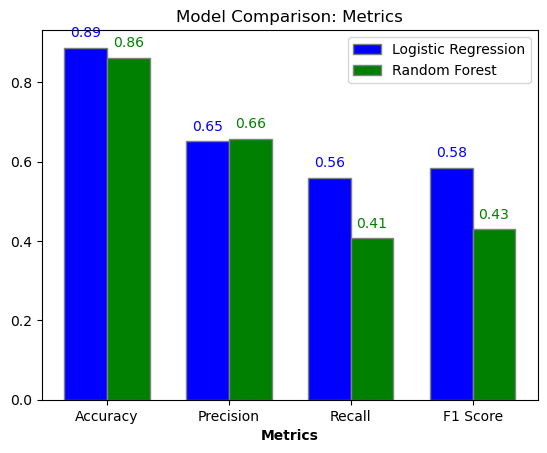

In [84]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assume log_reg_pred, rf_pred are the predictions of Logistic Regression and Random Forest
# Assume y_test is the true labels

# Logistic Regression Metrics
log_reg_report = classification_report(y_test, log_reg_pred, target_names=['negative', 'neutral', 'positive'], output_dict=True)
log_reg_accuracy = log_reg_report['accuracy']
log_reg_precision = log_reg_report['macro avg']['precision']
log_reg_recall = log_reg_report['macro avg']['recall']
log_reg_f1_score = log_reg_report['macro avg']['f1-score']

# Random Forest Metrics
rf_report = classification_report(y_test, rf_y_pred, target_names=['negative', 'neutral', 'positive'], output_dict=True)
rf_accuracy = rf_report['accuracy']
rf_precision = rf_report['macro avg']['precision']
rf_recall = rf_report['macro avg']['recall']
rf_f1_score = rf_report['macro avg']['f1-score']

# Metrics and models for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_values = [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1_score]
rf_values = [rf_accuracy, rf_precision, rf_recall, rf_f1_score]

# Plotting
barWidth = 0.35
r1 = np.arange(len(metrics))
r2 = [x + barWidth for x in r1]

plt.bar(r1, log_reg_values, color='blue', width=barWidth, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, rf_values, color='green', width=barWidth, edgecolor='grey', label='Random Forest')

plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(metrics))], metrics)
plt.title('Model Comparison: Metrics')
plt.legend()

# Display the metric values on the bars
for i, v in enumerate(log_reg_values):
    plt.text(i, v + 0.02, f'{round(v, 2)}', ha='center', va='bottom', color='blue')

for i, v in enumerate(rf_values):
    plt.text(i + barWidth, v + 0.02, f'{round(v, 2)}', ha='center', va='bottom', color='green')

plt.show()


## Save models

In [86]:
import joblib

# Assuming rf_model is the best-performing model
joblib.dump(rf_model, 'sentiment_analysis_model.joblib')
# log reg
joblib.dump(model,'sentiment_analysis_model_lg.joblib')

['sentiment_analysis_model_lg.joblib']